In [5]:
pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl (8.9 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- -----------

## Модели классификации для нескольких классов

Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов классификации.

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width). Требуется на основе этого набора данных, построить различные модели многоклассовой классификации, оценивающие каждый из трех видов растения по данным проведенных измерений.

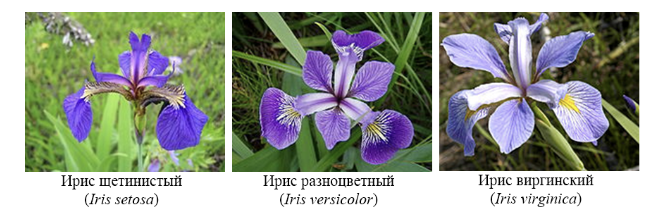

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Библиотека Scikit-Learn предоставляет чистые датасеты, которые вы можете использовать при построении моделей машинного обучения. Они поставляются вместе с Scikit-Learn (https://scikit-learn.ru/7-1-toy-datasets/).

Набор данных Iris, классический набор данных в машинном обучении и статистике. Он входит в модуль datasets библиотеки scikit-learn и загрузить его можно, вызвав функцию load_iris().

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.

Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

In [7]:
type(iris)

sklearn.utils._bunch.Bunch

Объект Bunch — это словарь, который предоставляет свои ключи как атрибуты.

Формируем DataFrame:

In [8]:
iris_df = pd.DataFrame(iris.data)

In [9]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
iris_df.shape

(150, 6)

In [12]:
# информация о наборе данных
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   name               150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [15]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Описательная статистика

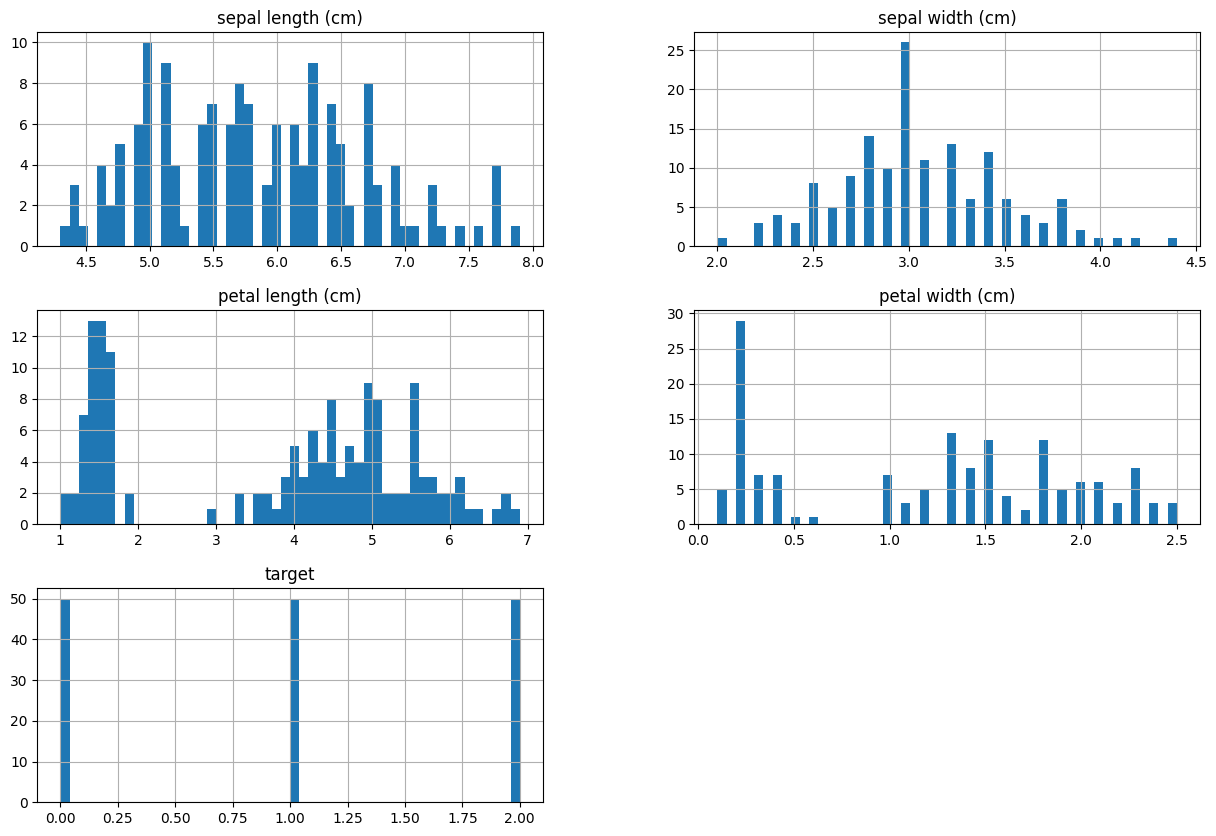

In [16]:
iris_df.hist(figsize = (15,10), bins = 50);

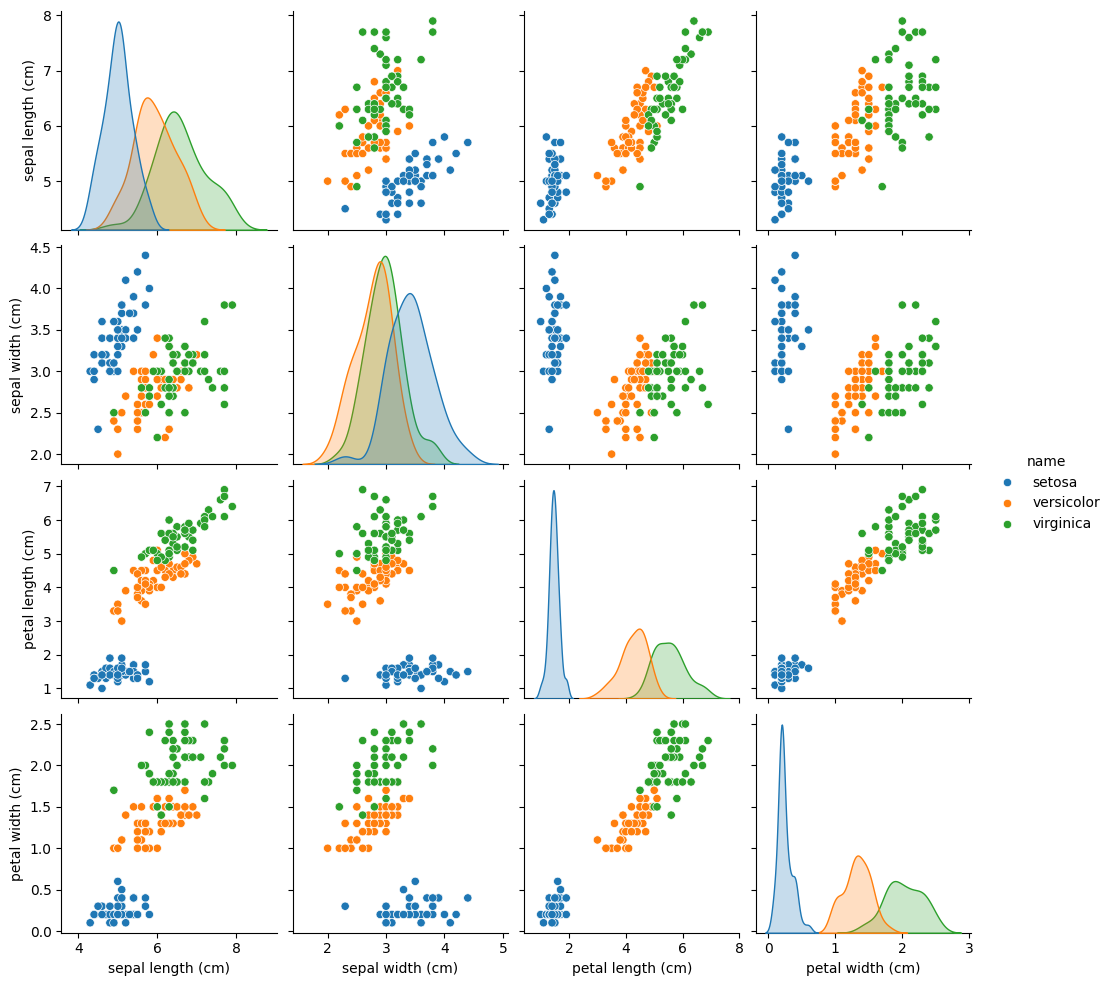

In [17]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

Видно, что «petal width (cm)» и «petal length (cm)» имеют сильную зависимость — точки вытянуты вдоль одной линии. И в принципе по этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы достаточно компактно. А вот, например, с помощью переменных «sepal width (cm)» и «sepal length (cm)» качественную классификацию не построить, т.к. точки, относящиеся к сортам Versicolor и Virginica, перемешаны между собой.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

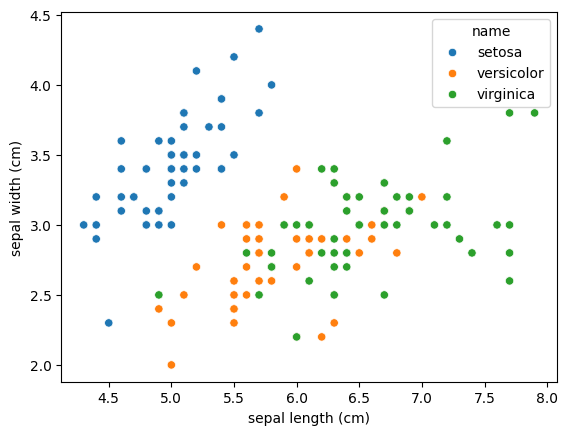

In [18]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")

In [19]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

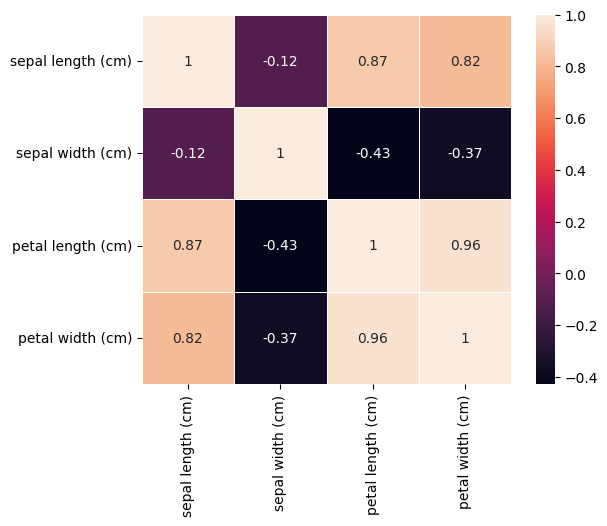

In [20]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

Действительно видим, что между переменными «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96, а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

### Обучение классификатора

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], 
                                                      iris_df['target'], 
                                                      test_size=0.3, 
                                                      random_state=19)

In [23]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(10, input_shape=(4,), activation='relu', name='input'),
    tf.keras.layers.Dense(10, activation='relu', name='hidden'),
    tf.keras.layers.Dense(3, activation='softmax', name='output'),
])


In [24]:
    early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                50        
                                                                 
 hidden (Dense)              (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
History = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test),callbacks = [early_stop])

Epoch 1/200
7/7 [==============================] - 1s 33ms/step - loss: 1.1936 - accuracy: 0.5810 - val_loss: 1.1046 - val_accuracy: 0.6222
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 1.1284 - accuracy: 0.5810 - val_loss: 1.0489 - val_accuracy: 0.6000
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 1.0693 - accuracy: 0.5714 - val_loss: 0.9940 - val_accuracy: 0.5778
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 1.0114 - accuracy: 0.5619 - val_loss: 0.9402 - val_accuracy: 0.5778
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 0.9568 - accuracy: 0.5333 - val_loss: 0.8889 - val_accuracy: 0.5778
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.8981 - accuracy: 0.5714 - val_loss: 0.8346 - val_accuracy: 0.6222
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.8432 - accuracy: 0.5810 - val_loss: 0.7857 - val_accuracy: 0.6444
Epoch 8/200
7/7 [=========

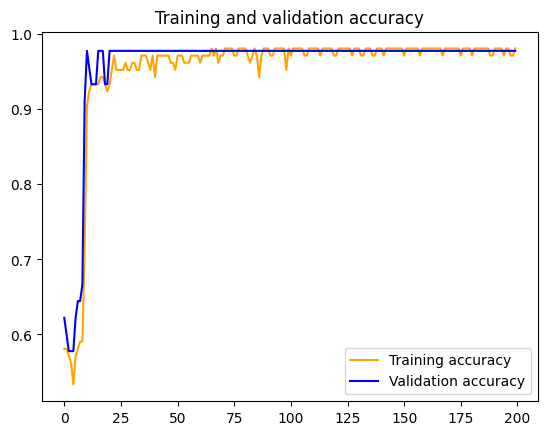

<Figure size 640x480 with 0 Axes>

In [28]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model accuracy on test data: {accuracy * 100:.2f}%')

2/2 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9778
Model accuracy on test data: 97.78%


In [30]:
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
predictions = model.predict(X)

In [31]:
predictions

array([[9.99656081e-01, 3.43956519e-04, 3.78341305e-08],
       [9.98726904e-01, 1.27279386e-03, 2.72664352e-07],
       [9.99389529e-01, 6.10377872e-04, 1.28029598e-07],
       [9.98827755e-01, 1.17195328e-03, 2.71713475e-07],
       [9.99704301e-01, 2.95652513e-04, 3.14029087e-08],
       [9.99767244e-01, 2.32806677e-04, 1.40731284e-08],
       [9.99516249e-01, 4.83659300e-04, 9.20488716e-08],
       [9.99459088e-01, 5.40840090e-04, 6.83515751e-08],
       [9.98406589e-01, 1.59285392e-03, 5.47540367e-07],
       [9.98875797e-01, 1.12392812e-03, 1.93222846e-07],
       [9.99750435e-01, 2.49504985e-04, 1.71884871e-08],
       [9.99318123e-01, 6.81810139e-04, 9.61438431e-08],
       [9.98815179e-01, 1.18455268e-03, 2.52809173e-07],
       [9.99185264e-01, 8.14538449e-04, 2.79486017e-07],
       [9.99896646e-01, 1.03340717e-04, 4.18665813e-09],
       [9.99927998e-01, 7.19384916e-05, 2.15753504e-09],
       [9.99843001e-01, 1.56923095e-04, 1.06976925e-08],
       [9.99657989e-01, 3.42033

In [32]:
test = np.argmax(predictions,axis=1)
prediction = test.flatten()

In [33]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
y = iris_df['target']
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.94      0.97        50
           2       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



## Обучение моделей

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [84]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
# from tensorflow.keras.datasets import mnist

### Модель нейронной сети

In [87]:
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], 
                                                      iris_df['target'], 
                                                      test_size=0.3, 
                                                      random_state=19)

In [88]:
class_names = ['Setosa', "Versicolor", "Virginica"]

In [89]:
x_train_n.shape, x_test_n.shape

((105, 4), (45, 4))

In [90]:
y_train_n.shape, y_test_n.shape

((105,), (45,))

#### Обучение модели

In [91]:
model_v2 = keras.Sequential([keras.layers.Flatten(input_shape=(4,)),
                         keras.layers.Dense(10, activation='relu'),
                         keras.layers.Dense(3, activation='softmax')])

In [92]:
# model_v2 = keras.Sequential([keras.layers.Flatten(input_shape=(4,)),
#                          keras.layers.Dense(10, activation='relu',  name='hidden'),
#                          keras.layers.Dense(3, activation='softmax', name='output')])

#### Настройки модели

In [93]:
model_v2.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [94]:
model_v2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


#### Тренируем модель

In [95]:
# используем итеративный метод для избежания переобучения модели
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [96]:
%%time
# Обучаем модель на обучающей выборке
hst = model_v2.fit(x_train_n, y_train_n, epochs=200, validation_data=(x_test_n, y_test_n), callbacks = [early_stop])
hst

Epoch 1/200
4/4 [==============================] - 0s 48ms/step - loss: 1.6782 - accuracy: 0.3333 - val_loss: 1.4213 - val_accuracy: 0.3333
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 1.3715 - accuracy: 0.3143 - val_loss: 1.2783 - val_accuracy: 0.2667
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 1.2758 - accuracy: 0.2381 - val_loss: 1.2260 - val_accuracy: 0.2667
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 1.2186 - accuracy: 0.3143 - val_loss: 1.1753 - val_accuracy: 0.2889
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 1.1687 - accuracy: 0.2952 - val_loss: 1.1311 - val_accuracy: 0.1778
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 1.1195 - accuracy: 0.2000 - val_loss: 1.0765 - val_accuracy: 0.3111
Epoch 7/200
4/4 [==============================] - 0s 31ms/step - loss: 1.0621 - accuracy: 0.3524 - val_loss: 1.0315 - val_accuracy: 0.4000
Epoch 8/200
4/4 [=====

#### Проверяем точность

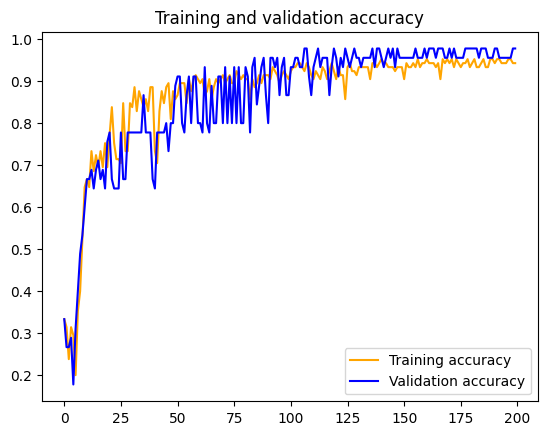

<Figure size 640x480 with 0 Axes>

In [97]:
acc = hst.history['accuracy']
val_acc = hst.history['val_accuracy']
loss = hst.history['loss']
val_loss = hst.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [98]:
test_loss, test_acc = model_v2.evaluate(x_test_n, y_test_n)
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 3ms/step - loss: 0.2286 - accuracy: 0.9778
Test accuracy: 0.9777777791023254


In [99]:
predictions_v2 = model_v2.predict(x_test_n)

In [100]:
predictions_v2[6]

array([9.4216031e-01, 5.7716295e-02, 1.2341169e-04], dtype=float32)

In [101]:
np.argmax(predictions_v2[6])

0

In [102]:
y_test_n[6]

0

In [103]:
class_names[np.argmax(predictions_v2[6])]

'Setosa'

In [104]:
predictions_v2

array([[9.6500087e-01, 3.4960158e-02, 3.8972306e-05],
       [1.0486336e-03, 4.2337814e-01, 5.7557321e-01],
       [5.8438713e-03, 6.0054886e-01, 3.9360720e-01],
       [2.8056875e-02, 7.8429419e-01, 1.8764897e-01],
       [9.7272336e-01, 2.7259791e-02, 1.6758871e-05],
       [9.6822453e-01, 3.1748351e-02, 2.7119006e-05],
       [9.4216031e-01, 5.7716295e-02, 1.2341169e-04],
       [9.7331727e-01, 2.6658161e-02, 2.4558343e-05],
       [1.4699404e-02, 7.3874003e-01, 2.4656057e-01],
       [4.3865952e-05, 1.8071736e-01, 8.1923872e-01],
       [2.4035688e-02, 7.1145171e-01, 2.6451260e-01],
       [9.4991261e-01, 5.0029851e-02, 5.7543777e-05],
       [1.3297665e-02, 7.5656837e-01, 2.3013389e-01],
       [9.4136244e-01, 5.8545418e-02, 9.2093273e-05],
       [5.8504246e-04, 2.9780698e-01, 7.0160794e-01],
       [9.6090817e-01, 3.9019749e-02, 7.2098323e-05],
       [3.3861812e-04, 2.4190597e-01, 7.5775546e-01],
       [9.8870766e-01, 1.1290458e-02, 1.8817993e-06],
       [9.9457286e-02, 8.432

In [105]:
test_v2 = np.argmax(predictions_v2, axis=1)
prediction_v2 = test_v2.flatten()

In [106]:
prediction_v2

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2,
       2], dtype=int64)

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test_n, prediction_v2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        16
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Классическая модель классификации

#### KNeighborsClassifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn_v1 = KNeighborsClassifier(n_neighbors=1)

In [110]:
# Обучаем модель на обучающей выборке
knn_v1.fit(x_train_n, y_train_n)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [111]:
knn_pred_test = knn_v1.predict(x_test_n)
knn_pred_test

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [112]:
accuracy_score(y_test_n, knn_pred_test)

0.9333333333333333

In [113]:
print(classification_report(y_test_n, knn_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



### Ансамблевая модель

#### StackingClassifier 

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [120]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=15, random_state=19)),
    ('knn', KNeighborsClassifier())
]

In [121]:
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [122]:
%%time
# Обучаем модель на обучающей выборке
sclf.fit(x_train_n, y_train_n)

CPU times: total: 172 ms
Wall time: 178 ms


,estimators,"[('rf', ...), ('knn', ...)]"
,final_estimator,LogisticRegression()
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,15
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [123]:
sclf.score(x_test_n, y_test_n)

0.9555555555555556

In [124]:
y_pred_sclf = sclf.predict(x_test_n)
y_pred_sclf

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [125]:
print(classification_report(y_test_n, y_pred_sclf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94        16
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### Сравнение моделей

In [126]:
print('Модель нейронной сети \n' + classification_report(y_test_n, prediction_v2))
print('-' * 53)

print('KNeighborsClassifier \n' + classification_report(y_test_n, knn_pred_test))
print('-' * 53)

print('StackingClassifier \n' + classification_report(y_test_n, y_pred_sclf))
print('-' * 53)

Модель нейронной сети 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        16
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

-----------------------------------------------------
KNeighborsClassifier 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45

-----------------------------------------------------
StackingClassifier 
              precision    recall  f1-score   support

          

### Вывод
Для работы был использован датасет **«Ирисы Фишера»**, содержащий набор данных из 4 характеристик: длина и ширина чашелистика, длина и ширина лепестка. \
Выборка состоит из 150 экземпляров трех видов ириса - **Setosa, Versicolor, Virginica**

На основе выборки было построено 3 модели машинного обучения:
* **Модель нейронной сети**
* **KNeighborsClassifier**
* **StackingClassifier (RandomForestClassifier, KNeighborsClassifier)**

Все модели одинаково и очень хорошо предсказали **0 класс (Setosa)** - c точностью **1.00** \
Наибольную точность, показали **Модель нейронной сети** и **StackingClassifier**:
* **Модель нейронной сети** - с точностью - **0.98**
* **StackingClassifier** - с точностью - **0.96**

Хуже всего себя показала модель **KNeighborsClassifier** - с точностью **0.93** \
В результате проделанной работы, можно сделать вывод, лучше остальных моделей определяет экземпляр ириса - **Модель нейронной сети** 